In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path("/Users/loso/code/hildieleyser/inkling")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(PROJECT_ROOT)


/Users/loso/code/hildieleyser/inkling


In [2]:
from zaki_EMG_packages.extract import list_datasets, load_emg

In [3]:
emg_file = Path("/Users/loso/Downloads/EMG-nature_data_participant_1_participant1_day1_block1_emg_data (2).hdf5")

print(emg_file.exists())

True


In [4]:
datasets = list_datasets(emg_file)
print(datasets)
#each key is one signal

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [5]:
#each key is one signal
emg = load_emg(emg_file, dataset_name="0")
print(type(emg))
print(emg.shape)

<class 'numpy.ndarray'>
(16, 9980)


In [16]:
emg

array([[ 3.76349817e-05,  1.98425078e-05,  9.07169760e-06, ...,
        -7.89036676e-06, -1.49826537e-05, -1.43748375e-05],
       [ 2.48200813e-05,  2.62004924e-05,  2.57970714e-05, ...,
         2.36397518e-05,  2.26163229e-05,  2.11052029e-05],
       [ 7.70358292e-06,  9.89300042e-06,  1.07674778e-05, ...,
         1.03989842e-05,  9.96852668e-06,  9.72673752e-06],
       ...,
       [-8.37383777e-06, -1.24599992e-05, -1.28278034e-05, ...,
        -1.55725484e-05, -1.43470406e-05, -1.06217649e-05],
       [-1.57952236e-05, -1.61320277e-05, -1.29005557e-05, ...,
        -9.94938546e-06, -9.96866675e-06, -1.09153243e-05],
       [-1.30936751e-05, -1.76599133e-05, -1.61400549e-05, ...,
        -1.25840334e-05, -1.46363518e-05, -1.61670978e-05]], dtype=float32)

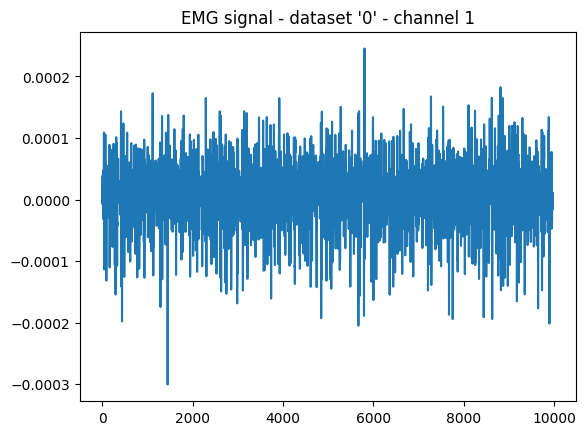

In [6]:
import matplotlib.pyplot as plt

plt.plot(emg[0])  # channel 1
plt.title("EMG signal - dataset '0' - channel 1")
plt.show()

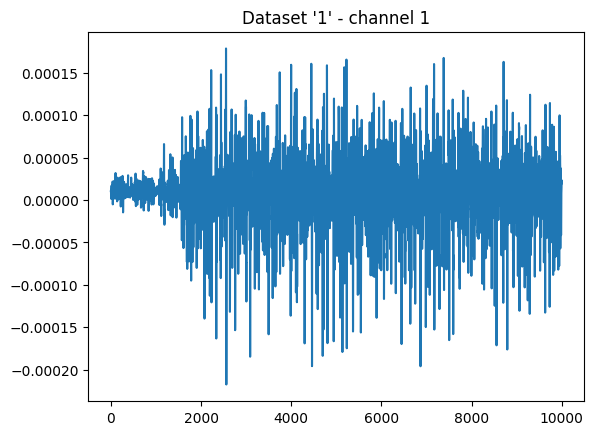

In [7]:
emg2 = load_emg(emg_file, dataset_name="1")
plt.plot(emg2[0])
plt.title("Dataset '1' - channel 1")
plt.show()


In [8]:
for key in ['0', '1', '2', '3']:
    sig = load_emg(emg_file, dataset_name=key)
    print(key, sig.shape)


0 (16, 9980)
1 (16, 10000)
2 (16, 9960)
3 (16, 10020)


In [9]:
from zaki_EMG_packages.preprocess import fix_length, reshape_for_model


In [10]:
emg0 = load_emg(emg_file, dataset_name="0")
print("raw shape:", emg0.shape)


raw shape: (16, 9980)


In [11]:
emg0_fixed = fix_length(emg0, target_length=10000)
print("fixed shape:", emg0_fixed.shape)


fixed shape: (16, 10000)


In [12]:
x0 = reshape_for_model(emg0_fixed)
print("ready for model:", x0.shape)


ready for model: (1, 10000, 16)


In [13]:
from pathlib import Path
import sys

PROJECT_ROOT = Path("/Users/loso/code/hildieleyser/inkling")
sys.path.append(str(PROJECT_ROOT))

from zaki_EMG_packages.predict import predict_from_hdf5

file = Path('/Users/loso/Downloads/EMG-nature_data_participant_6_participant6_day2_block1_emg_data.hdf5')
print("Prediction:", predict_from_hdf5(file, dataset_name="0"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Prediction: 1


In [1]:
from zaki_EMG_packages.predict import predict_from_hdf5
from pathlib import Path

f = Path("/Users/loso/Downloads/your_file.hdf5")

for key in ["0", "1", "2"]:
    print(key, "→", predict_from_hdf5(f, dataset_name=key))


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/loso/Downloads/your_file.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)